## Resources 

https://www.google.com/search?client=safari&rls=en&q=flood+fill&ie=UTF-8&oe=UTF-8



Using cache found in /Users/rakin/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /Users/rakin/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /Users/rakin/.cache/torch/hub/intel-isl_MiDaS_master


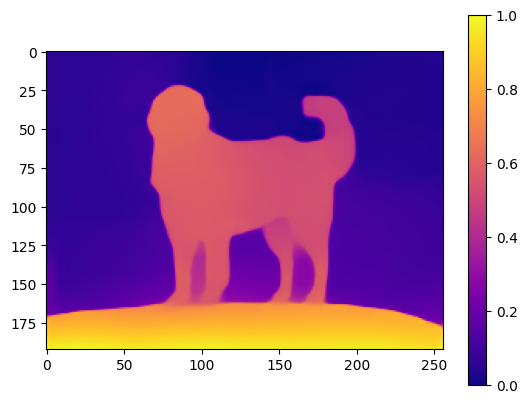

In [4]:
## code to run for monocular depth 

import torch
import cv2
import numpy as np
from torchvision import transforms

# Load MiDaS model
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")  # "MiDaS" for high accuracy
midas.eval()

# Load transforms
transform = torch.hub.load("intel-isl/MiDaS", "transforms").small_transform

# Load and preprocess image
img = cv2.imread("imgs/dog.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img).unsqueeze(0)
input_batch = input_batch.squeeze(1)  # Removes the extra dimension
# Run inference
with torch.no_grad():
    prediction = midas(input_batch)

# Convert to depth map
depth_map = prediction.squeeze().cpu().numpy()
depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())  # Normalize

# Display depth map
import matplotlib.pyplot as plt
plt.imshow(depth_map, cmap="plasma")
plt.colorbar()
plt.show()


